In [7]:
import csv
import re
import matplotlib.pyplot as plt
import pandas as pd
import ast

In [8]:
run_id = "3ce1d440-8ff2de36"

df0 = pd.read_csv(f"logs/{run_id}/singular_values_at_step0.csv")
df0['singular_values'] = df0['singular_values'].apply(ast.literal_eval)

In [9]:
df0.columns

Index(['newton_schulz_iter', 'singular_values'], dtype='object')

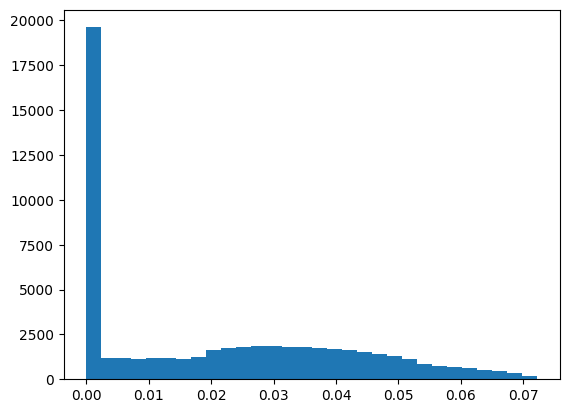

In [14]:
plt.hist(df0.loc[df0['newton_schulz_iter']==0, "singular_values"], bins=30)
plt.show()


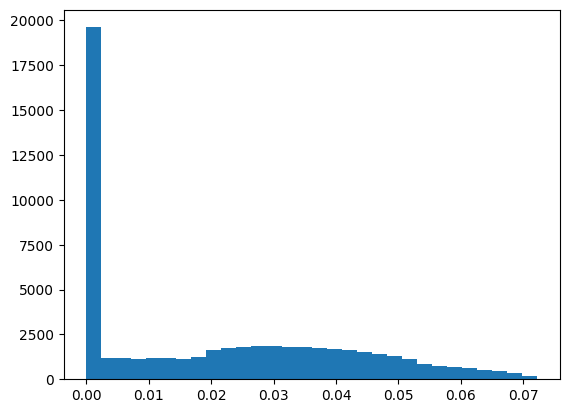

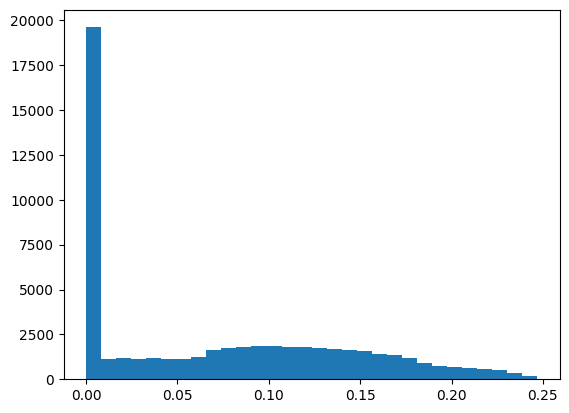

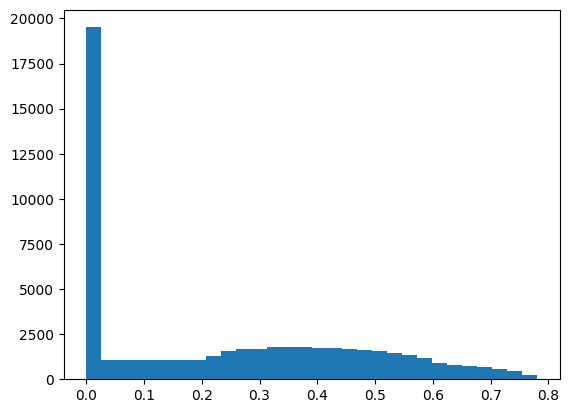

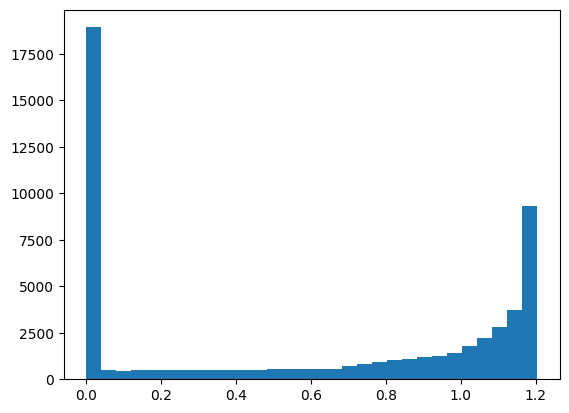

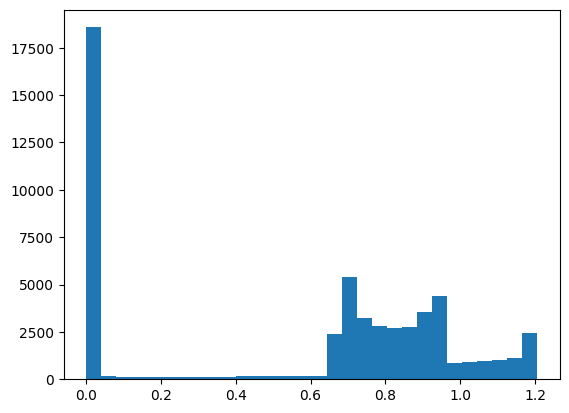

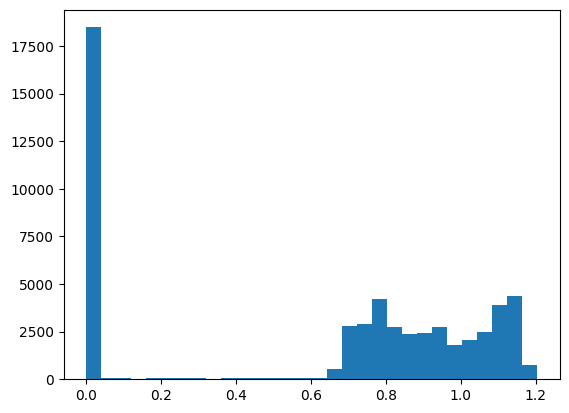

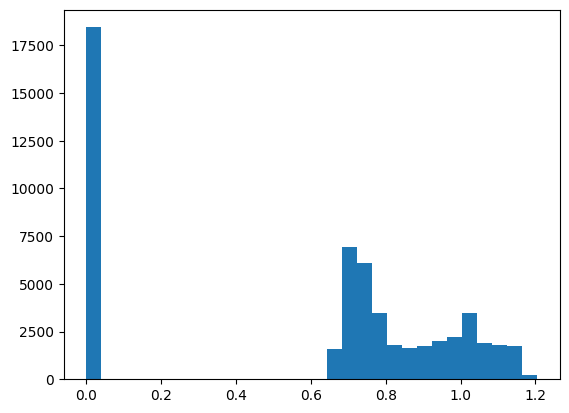

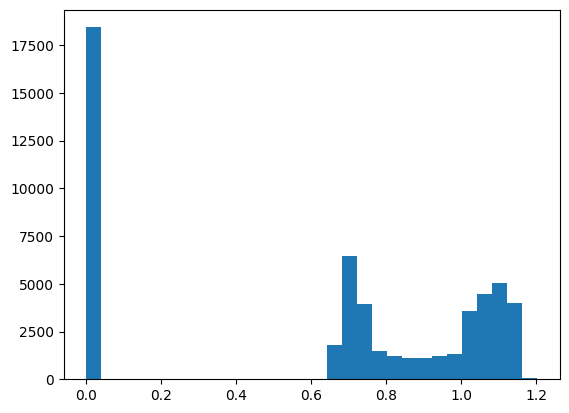

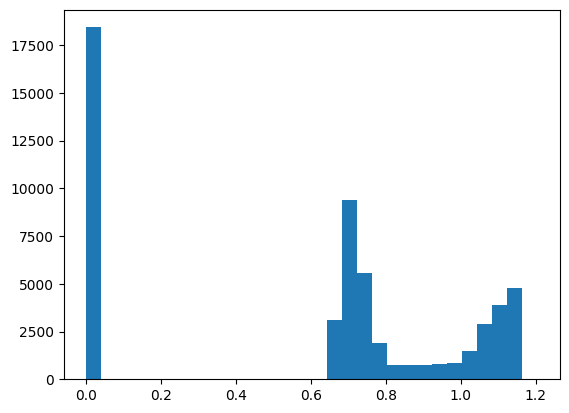

In [15]:
# now plot the singular values over newton schulz iterations
# as a gif or animation
# start on the next line

for i in range(df0['newton_schulz_iter'].max()):
    plt.hist(df0.loc[df0['newton_schulz_iter']==i, "singular_values"], bins=30)
    plt.show()



In [30]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import numpy as np
from IPython.display import Image, display

def animate_singular_values(df0, save_path='singular_values.gif', interval=500, bins=30):
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Unpack lists and find global min/max
    all_values = np.concatenate(df0['singular_values'].values)
    value_range = (float(np.min(all_values)), float(np.max(all_values)))
    
    def update(i):
        ax.clear()
        current_data = np.concatenate(df0[df0['newton_schulz_iter'] == i]['singular_values'].values)
        
        ax.hist(current_data, bins=bins, 
               range=value_range,
               alpha=0.7, color='blue')
            
        ax.set(xlabel='Singular Values', 
               ylabel='Frequency',
               title=f'Singular Values Distribution - Iteration {i}')
        ax.grid(alpha=0.3)
    
    anim = FuncAnimation(
        fig, 
        update,
        frames=int(df0['newton_schulz_iter'].max()) + 1,
        interval=interval
    )
    
    # Save as GIF
    writer = PillowWriter(fps=1000/interval)  # Convert interval to fps
    anim.save(save_path, writer=writer)
    plt.close()
    
    return anim

# Usage:
# animate_singular_values(df0, save_path='my_animation.gif', interval=500)

In [31]:
anim = animate_singular_values(df0, save_path='my_animation.gif', interval=500)

In [32]:
display(Image('my_animation.gif'))

FileNotFoundError: No such file or directory: '<matplotlib.animation.FuncAnimation object at 0x779220fa5eb0>'

FileNotFoundError: No such file or directory: '<matplotlib.animation.FuncAnimation object at 0x779220fa5eb0>'

<IPython.core.display.Image object>